# **Kaggle HW5: Milk Team**

**Remember to write your team name above, which MUST match your team name on Kaggle!!** Assignments without a team name will receive a 0/40 on the "accuracy on test data" component of this assignment's grade.

### **Load the Data**

In [ ]:
# This cell is necessary only if you are running on Google Colab. It downloads the files to your
# Colab instance so you don't have to upload them here.

import requests

def save_file(url, file_name):
    r = requests.get(url)
    with open(file_name, 'wb') as f:
      f.write(r.content)

save_file('https://courses.cs.washington.edu/courses/cse416/23sp/homeworks/hw5/edx_train.csv', 
          'edx_train.csv')
save_file('https://courses.cs.washington.edu/courses/cse416/23sp/homeworks/hw5/edx_test.csv', 
          'edx_test.csv')

### **Sample Code: Random Classifier**

**NOTE**: This classifier **DOES NOT** count as one of the 2 required for this assignment! It is merely here to illstrate how to submit your predictions.

See the Kaggle assignment (Data tab) for a description of each column in the dataset. You are creating a classifier to predict whether or not a student will get certified, stored in the `"certified"` column.

In [ ]:
import pandas as pd
from sklearn.dummy import DummyClassifier

target = "certified" # target column

# This classifier returns labels sampled uniformly at random
df_train = pd.read_csv('edx_train.csv')
dummy_model = DummyClassifier(strategy="uniform")
dummy_model.fit(df_train.drop(target, axis=1), df_train[target])

DummyClassifier(strategy='uniform')

The code below generates predictions on the test set, and outputs the predictions into a CSV file.

In [ ]:
# Generate predictions on the test set
df_test = pd.read_csv('edx_test.csv')
predictions = dummy_model.predict(df_test)

# Save your predictions as a CSV
to_save = df_test[['userid_DI']].copy()
to_save.loc[:, 'certified'] = predictions
to_save.to_csv('submission.csv', index=False)

# See below for instructions on how to upload submission.csv to Kaggle,
# in order to evaluate your model and get points.

### **[5 Pts] Model Comparison**

**Instructions**: Run at least 2 different classification models. The classification models we have learned in class are: [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), [k-Nearest Neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), [Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Random Forests](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), and [AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html), [Neural Networks](https://scikit-learn.org/stable/modules/neural_networks_supervised.html). For each model, try at least 2 different hyperparameter settings. 

Then, make one or more visualizations that let you compare the models you trained. Sample visualizations you can make include confusion matrices, or graphs of train and validation accuracy/error. See past section and homework code for how to make these visualizations.

### **Data Pre-processing**

In [ ]:
df_train.head()

,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts
0,HarvardX/CS50x/2012,MHxPC130545492,1,1,1,1,United States,Master's,1984.0,m,3/10/13,7/29/13,1161.0,50.0,NaN,12.0,0
1,HarvardX/ER22x/2013_Spring,MHxPC130536944,1,1,1,1,United Kingdom,Master's,1985.0,f,3/13/13,8/1/13,1360.0,10.0,NaN,29.0,0
2,HarvardX/CS50x/2012,MHxPC130442298,1,1,1,1,India,NaN,NaN,NaN,8/2/12,7/25/13,77.0,18.0,NaN,7.0,0
3,HarvardX/ER22x/2013_Spring,MHxPC130273564,1,1,1,1,United Kingdom,Bachelor's,1982.0,m,1/23/13,8/13/13,1425.0,29.0,NaN,34.0,0
4,HarvardX/CS50x/2012,MHxPC130247761,1,1,0,0,United States,Secondary,1989.0,m,3/5/13,3/5/13,6.0,1.0,NaN,1.0,0


In [ ]:
print("Percent of missing data")
df_train.isna().sum() / len(df_train)

Percent of missing data


course_id            0.000000
userid_DI            0.000000
registered           0.000000
viewed               0.000000
explored             0.000000
certified            0.000000
final_cc_cname_DI    0.000000
LoE_DI               0.110299
YoB                  0.104362
gender               0.088491
start_time_DI        0.000000
last_event_DI        0.172185
nevents              0.187143
ndays_act            0.187143
nplay_video          0.770381
nchapters            0.292647
nforum_posts         0.000000
dtype: float64

In [ ]:
df_train = df_train.drop('nplay_video', axis=1)

In [ ]:
df_train['start_time_DI'] = (pd.Timestamp.now() - pd.to_datetime(df_train['start_time_DI'], format='%m/%d/%y')).dt.days
df_train['last_event_DI'] = (pd.Timestamp.now() - pd.to_datetime(df_train['last_event_DI'], format='%m/%d/%y')).dt.days

In [ ]:
df_train.head()

,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,start_time_DI,last_event_DI,nevents,ndays_act,nchapters,nforum_posts
0,HarvardX/CS50x/2012,MHxPC130545492,1,1,1,1,United States,Master's,1984.0,m,3720,3579.0,1161.0,50.0,12.0,0
1,HarvardX/ER22x/2013_Spring,MHxPC130536944,1,1,1,1,United Kingdom,Master's,1985.0,f,3717,3576.0,1360.0,10.0,29.0,0
2,HarvardX/CS50x/2012,MHxPC130442298,1,1,1,1,India,NaN,NaN,NaN,3940,3583.0,77.0,18.0,7.0,0
3,HarvardX/ER22x/2013_Spring,MHxPC130273564,1,1,1,1,United Kingdom,Bachelor's,1982.0,m,3766,3564.0,1425.0,29.0,34.0,0
4,HarvardX/CS50x/2012,MHxPC130247761,1,1,0,0,United States,Secondary,1989.0,m,3725,3725.0,6.0,1.0,1.0,0


In [ ]:
# df_train = pd.get_dummies(df_train.drop('userid_DI', axis=1))
# df_train = pd.get_dummies(df_train.drop(['userid_DI','explored'], axis=1))
# df_train = pd.get_dummies(df_train.drop(['userid_DI','final_cc_cname_DI'], axis=1))
df_train = pd.get_dummies(df_train.drop(['userid_DI','explored', 'final_cc_cname_DI'], axis=1))
features = list(df_train.columns)
features.remove(target)
features

['registered',
 'viewed',
 'YoB',
 'start_time_DI',
 'last_event_DI',
 'nevents',
 'ndays_act',
 'nchapters',
 'nforum_posts',
 'course_id_HarvardX/CB22x/2013_Spring',
 'course_id_HarvardX/CS50x/2012',
 'course_id_HarvardX/ER22x/2013_Spring',
 'course_id_HarvardX/PH207x/2012_Fall',
 'course_id_HarvardX/PH278x/2013_Spring',
 "LoE_DI_Bachelor's",
 'LoE_DI_Doctorate',
 'LoE_DI_Less than Secondary',
 "LoE_DI_Master's",
 'LoE_DI_Secondary',
 'gender_f',
 'gender_m']

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5, weights='distance')
df_train = pd.DataFrame(imputer.fit_transform(df_train), columns=df_train.columns)

In [ ]:
df_train.head()

,registered,viewed,certified,YoB,start_time_DI,last_event_DI,nevents,ndays_act,nchapters,nforum_posts,...,course_id_HarvardX/ER22x/2013_Spring,course_id_HarvardX/PH207x/2012_Fall,course_id_HarvardX/PH278x/2013_Spring,LoE_DI_Bachelor's,LoE_DI_Doctorate,LoE_DI_Less than Secondary,LoE_DI_Master's,LoE_DI_Secondary,gender_f,gender_m
0,1.0,1.0,1.0,1984.0,3720.0,3579.0,1161.0,50.0,12.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,1.0,1.0,1985.0,3717.0,3576.0,1360.0,10.0,29.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,1.0,1.0,1982.2,3940.0,3583.0,77.0,18.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1982.0,3766.0,3564.0,1425.0,29.0,34.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,1.0,0.0,1989.0,3725.0,3725.0,6.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_train[features])
df_train[features] = scaler.transform(df_train[features])

In [ ]:
df_train.head()

,registered,viewed,certified,YoB,start_time_DI,last_event_DI,nevents,ndays_act,nchapters,nforum_posts,...,course_id_HarvardX/ER22x/2013_Spring,course_id_HarvardX/PH207x/2012_Fall,course_id_HarvardX/PH278x/2013_Spring,LoE_DI_Bachelor's,LoE_DI_Doctorate,LoE_DI_Less than Secondary,LoE_DI_Master's,LoE_DI_Secondary,gender_f,gender_m
0,0.0,0.640729,1.0,0.018088,-0.605702,-0.885285,-0.076042,1.591541,0.112481,-0.145808,...,-0.576911,-0.540659,-0.323992,-0.713414,-0.193155,-0.156356,1.663395,-0.542070,-0.678705,0.823077
1,0.0,0.640729,1.0,0.127813,-0.633732,-0.918685,0.004008,-0.456836,1.921830,-0.145808,...,1.733370,-0.540659,-0.323992,-0.713414,-0.193155,-0.156356,1.663395,-0.542070,1.473394,-1.214953
2,0.0,0.640729,1.0,-0.179418,1.449836,-0.840750,-0.512091,-0.047161,-0.419680,-0.145808,...,-0.576911,-0.540659,-0.323992,-0.713414,-0.193155,-0.156356,-0.601180,-0.542070,-0.678705,-1.214953
3,0.0,0.640729,1.0,-0.201363,-0.175907,-1.052289,0.030155,0.516143,2.453991,-0.145808,...,1.733370,-0.540659,-0.323992,1.401711,-0.193155,-0.156356,-0.601180,-0.542070,-0.678705,0.823077
4,0.0,0.640729,0.0,0.566716,-0.558985,0.740220,-0.540651,-0.917721,-1.058274,-0.145808,...,-0.576911,-0.540659,-0.323992,-0.713414,-0.193155,-0.156356,-0.601180,1.844781,-0.678705,0.823077


In [ ]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.01)
lasso_model.fit(df_train[features], df_train[target])

Lasso(alpha=0.01)

In [ ]:
zero_coef_features = []
nonzero_coef_features = []
for feature, coef in zip(features, lasso_model.coef_):
  if abs(coef) <= 10 ** -17:
    zero_coef_features.append(feature)
  else:
    nonzero_coef_features.append(feature)

print("Features with coefficient == 0:", zero_coef_features)
print("Features with coefficient != 0:", nonzero_coef_features)

Features with coefficient == 0: ['registered', 'last_event_DI', 'nforum_posts', 'course_id_HarvardX/CS50x/2012', "LoE_DI_Bachelor's", 'LoE_DI_Doctorate', 'LoE_DI_Less than Secondary', "LoE_DI_Master's", 'LoE_DI_Secondary', 'gender_f', 'gender_m']
Features with coefficient != 0: ['viewed', 'YoB', 'start_time_DI', 'nevents', 'ndays_act', 'nchapters', 'course_id_HarvardX/CB22x/2013_Spring', 'course_id_HarvardX/ER22x/2013_Spring', 'course_id_HarvardX/PH207x/2012_Fall', 'course_id_HarvardX/PH278x/2013_Spring']


In [ ]:
# features = ['viewed', 'explored', 'YoB', 'last_event_DI', 'nevents', 'ndays_act', 'nchapters', 'course_id_HarvardX/CB22x/2013_Spring', 'course_id_HarvardX/CS50x/2012', 'course_id_HarvardX/ER22x/2013_Spring', 'final_cc_cname_DI_United States', 'final_cc_cname_DI_Unknown/Other']

In [ ]:
from sklearn.model_selection import train_test_split

train_data, validation_data = train_test_split(df_train, test_size=0.3, random_state=1)

### **Logistic Regression**

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
l2_penalties = np.logspace(-4, 3, 8)
l2_penalty_names = [f'coefficients [L2={l2_penalty:.0e}]' 
                    for l2_penalty in l2_penalties]

accuracy_data = []

for l2_penalty, l2_penalty_column_name in zip(l2_penalties, l2_penalty_names):
    C = 1 / l2_penalty
    lr_model = LogisticRegression(C=C, fit_intercept=False, random_state=1, max_iter=2000)
    lr_model.fit(train_data[features], train_data[target])

    train_accuracy = accuracy_score(train_data[target], lr_model.predict(train_data[features]))
    validation_accuracy = accuracy_score(validation_data[target], lr_model.predict(validation_data[features]))
    accuracy_data.append({
        'l2_penalty': l2_penalty,
        'train_accuracy': train_accuracy,
        'validation_accuracy': validation_accuracy
    })

accuracies_table = pd.DataFrame(accuracy_data)

In [ ]:
accuracies_table

,l2_penalty,train_accuracy,validation_accuracy
0,0.0001,0.951713,0.953196
1,0.0010,0.951713,0.953196
2,0.0100,0.951713,0.953196
3,0.1000,0.951713,0.953196
4,1.0000,0.951223,0.953196
5,10.0000,0.950082,0.952816
6,100.0000,0.946819,0.947489
7,1000.0000,0.934747,0.937976


In [ ]:
lr_model = LogisticRegression(C=1, fit_intercept=False, random_state=1, max_iter=2000)
lr_model.fit(df_train[features], df_train[target])
train_accuracy = accuracy_score(train_data[target], lr_model.predict(train_data[features]))
train_accuracy

0.9518760195758564

### **Decision Trees**

In [ ]:
# min_samples_split as 5
from sklearn.tree import DecisionTreeClassifier

depths = list(range(1, 23, 2))
depth_names = [f'coefficients [Depth={depth}]' for depth in depths]

accuracy_data = []

for depth, depth_name in zip(depths, depth_names):
    dt_model = DecisionTreeClassifier(max_depth=depth, min_samples_split = 5)
    dt_model.fit(train_data[features], train_data[target])

    train_accuracy = accuracy_score(train_data[target], dt_model.predict(train_data[features]))
    validation_accuracy = accuracy_score(validation_data[target], dt_model.predict(validation_data[features]))
    accuracy_data.append({
        'depth': depth,
        'train_accuracy': train_accuracy,
        'validation_accuracy': validation_accuracy
    })

accuracies_table = pd.DataFrame(accuracy_data)

In [ ]:
accuracies_table

,depth,train_accuracy,validation_accuracy
0,1,0.850082,0.846271
1,3,0.935073,0.938356
2,5,0.963948,0.967656
3,7,0.977977,0.973364
4,9,0.986786,0.969939
5,11,0.989233,0.968417
6,13,0.991843,0.964612
7,15,0.993638,0.962329
8,17,0.994454,0.960426
9,19,0.994943,0.961568


In [ ]:
# min_samples_split as 2
from sklearn.tree import DecisionTreeClassifier

depths = list(range(1, 23, 2))
depth_names = [f'coefficients [Depth={depth}]' for depth in depths]

accuracy_data = []

for depth, depth_name in zip(depths, depth_names):
    dt_model = DecisionTreeClassifier(max_depth=depth, min_samples_split = 2)
    dt_model.fit(train_data[features], train_data[target])

    train_accuracy = accuracy_score(train_data[target], dt_model.predict(train_data[features]))
    validation_accuracy = accuracy_score(validation_data[target], dt_model.predict(validation_data[features]))
    accuracy_data.append({
        'depth': depth,
        'train_accuracy': train_accuracy,
        'validation_accuracy': validation_accuracy
    })

accuracies_table = pd.DataFrame(accuracy_data)

In [ ]:
accuracies_table

,depth,train_accuracy,validation_accuracy
0,1,0.850082,0.846271
1,3,0.935073,0.938356
2,5,0.963948,0.967656
3,7,0.978140,0.972983
4,9,0.987928,0.970320
5,11,0.992333,0.964992
6,13,0.995595,0.966134
7,15,0.997553,0.962329
8,17,0.999021,0.962329
9,19,0.999511,0.960426


In [ ]:
import seaborn as sns
def plot_confusion_matrix(tp, fp, fn, tn):
    """
    Plots a confusion matrix using the values 
       tp - True Positive
       fp - False Positive
       fn - False Negative
       tn - True Negative
    """
    data = np.matrix([[tp, fp], [fn, tn]])

    sns.heatmap(data,annot=True,xticklabels=['Actual Pos', 'Actual Neg']
              ,yticklabels=['Pred. Pos', 'Pred. Neg']) 

error rate: 0.032343987823439835
accuracy rate: 0.9676560121765602


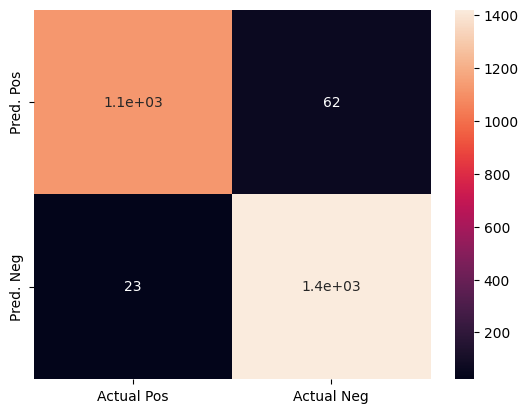

In [ ]:
from sklearn.metrics import confusion_matrix

dt_best_model = DecisionTreeClassifier(max_depth=5)
dt_best_model.fit(train_data[features], train_data[target])

y_true = validation_data['certified']
y_pred = dt_best_model.predict(validation_data[features])
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
plot_confusion_matrix(tp=tp, fp=fp, tn=tn, fn=fn)

error_rate = 1-((tp+tn)/(tp+tn+fp+fn))
acc_rate = 1 - error_rate
print("error rate:", error_rate)
print("accuracy rate:", acc_rate)

### **Random Forests**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# n_estimator as 200
depths = list(range(1, 23, 2))
depth_names = [f'coefficients [Depth={depth}]' for depth in depths]

accuracy_data = []

for depth, depth_name in zip(depths, depth_names):
    rf_model = RandomForestClassifier(n_estimators=200, max_depth=depth)
    rf_model.fit(train_data[features], train_data[target])

    train_accuracy = accuracy_score(train_data[target], rf_model.predict(train_data[features]))
    validation_accuracy = accuracy_score(validation_data[target], rf_model.predict(validation_data[features]))
    accuracy_data.append({
        'depth': depth,
        'train_accuracy': train_accuracy,
        'validation_accuracy': validation_accuracy
    })

accuracies_table = pd.DataFrame(accuracy_data)

In [ ]:
accuracies_table

,depth,train_accuracy,validation_accuracy
0,1,0.890212,0.890030
1,3,0.953181,0.953577
2,5,0.967863,0.971461
3,7,0.974388,0.974886
4,9,0.981077,0.977169
5,11,0.986786,0.980594
6,13,0.994943,0.982116
7,15,0.997553,0.981355
8,17,0.999511,0.982116
9,19,1.000000,0.980974


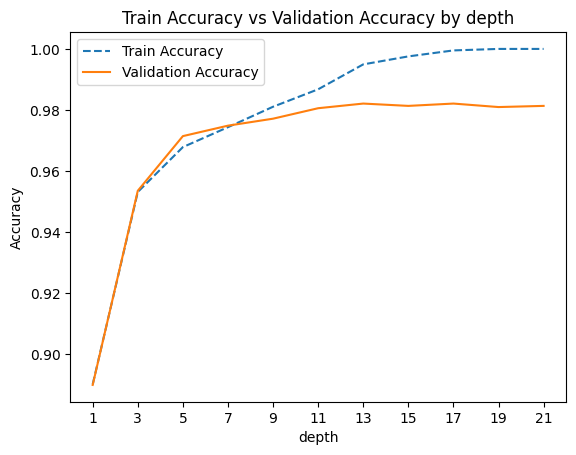

In [ ]:
depth = [each['depth'] for each in accuracy_data]
train_accuracy = [each['train_accuracy'] for each in accuracy_data]
validation_accuracy = [each['validation_accuracy'] for each in accuracy_data]

plt.plot(depth, train_accuracy, '--', label='Train Accuracy')
plt.plot(depth, validation_accuracy, label='Validation Accuracy')

plt.xlabel('depth')
plt.ylabel('Accuracy')
plt.title('Train Accuracy vs Validation Accuracy by depth')
plt.legend()
plt.xticks(depth)
plt.show()

In [ ]:
# n_estimator as 500
depths = list(range(1, 23, 2))
depth_names = [f'coefficients [Depth={depth}]' for depth in depths]

accuracy_data = []

for depth, depth_name in zip(depths, depth_names):
    rf_model = RandomForestClassifier(n_estimators=500, max_depth=depth)
    rf_model.fit(train_data[features], train_data[target])

    train_accuracy = accuracy_score(train_data[target], rf_model.predict(train_data[features]))
    validation_accuracy = accuracy_score(validation_data[target], rf_model.predict(validation_data[features]))
    accuracy_data.append({
        'depth': depth,
        'train_accuracy': train_accuracy,
        'validation_accuracy': validation_accuracy
    })

accuracies_table = pd.DataFrame(accuracy_data)

In [ ]:
accuracies_table

,depth,train_accuracy,validation_accuracy
0,1,0.867700,0.860350
1,3,0.955628,0.957763
2,5,0.967047,0.974505
3,7,0.974388,0.975266
4,9,0.980914,0.977930
5,11,0.987602,0.981355
6,13,0.993475,0.981735
7,15,0.997390,0.980974
8,17,0.999347,0.981735
9,19,1.000000,0.981355


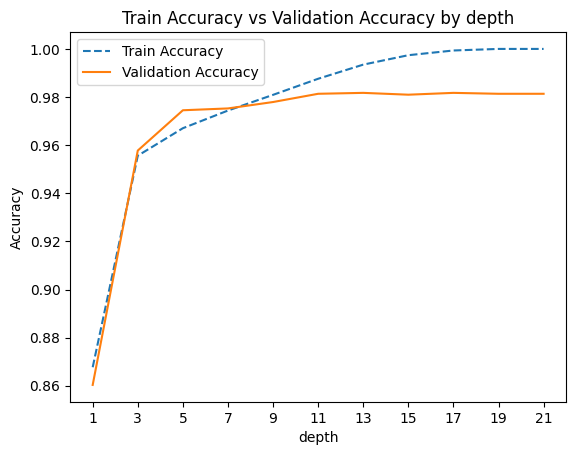

In [ ]:
depth = [each['depth'] for each in accuracy_data]
train_accuracy = [each['train_accuracy'] for each in accuracy_data]
validation_accuracy = [each['validation_accuracy'] for each in accuracy_data]

plt.plot(depth, train_accuracy, '--', label='Train Accuracy')
plt.plot(depth, validation_accuracy, label='Validation Accuracy')

plt.xlabel('depth')
plt.ylabel('Accuracy')
plt.title('Train Accuracy vs Validation Accuracy by depth')
plt.legend()
plt.xticks(depth)
plt.show()

error rate: 0.023592085235920823
accuracy rate: 0.9764079147640792


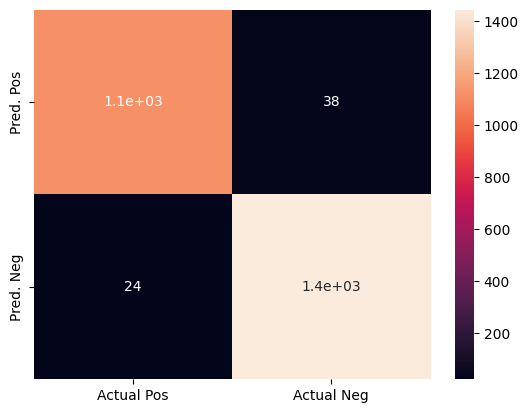

In [ ]:
from sklearn.metrics import confusion_matrix

rf_best_model = RandomForestClassifier(n_estimators=200, max_depth=7)
rf_best_model.fit(train_data[features], train_data[target])

y_true = validation_data['certified']
y_pred = rf_best_model.predict(validation_data[features])
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
plot_confusion_matrix(tp=tp, fp=fp, tn=tn, fn=fn)

error_rate = 1-((tp+tn)/(tp+tn+fp+fn))
acc_rate = 1 - error_rate
print("error rate:", error_rate)
print("accuracy rate:", acc_rate)

### **AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# max_depth for dt_model as 1
num_trees = list(range(100, 500, 100))
num_trees_names = [f'coefficients [#Trees={num}]' for num in num_trees]

accuracy_data = []

dt_model = DecisionTreeClassifier(max_depth=1)
for num, num_trees_name in zip(num_trees, num_trees_names):
    ab_model = AdaBoostClassifier(estimator=dt_model, n_estimators=num)
    ab_model.fit(train_data[features], train_data[target])

    train_accuracy = accuracy_score(train_data[target], ab_model.predict(train_data[features]))
    validation_accuracy = accuracy_score(validation_data[target], ab_model.predict(validation_data[features]))
    accuracy_data.append({
        'num_trees': num,
        'train_accuracy': train_accuracy,
        'validation_accuracy': validation_accuracy
    })

accuracies_table = pd.DataFrame(accuracy_data)

In [ ]:
accuracies_table

,num_trees,train_accuracy,validation_accuracy
0,100,0.967537,0.968798
1,200,0.969005,0.969939
2,300,0.971289,0.969939
3,400,0.971126,0.971461


In [ ]:
# max_depth for dt_model as 3
num_trees = list(range(100, 500, 100))
num_trees_names = [f'coefficients [#Trees={num}]' for num in num_trees]

accuracy_data = []

dt_model = DecisionTreeClassifier(max_depth=3)
for num, num_trees_name in zip(num_trees, num_trees_names):
    ab_model = AdaBoostClassifier(estimator=dt_model, n_estimators=num)
    ab_model.fit(train_data[features], train_data[target])

    train_accuracy = accuracy_score(train_data[target], ab_model.predict(train_data[features]))
    validation_accuracy = accuracy_score(validation_data[target], ab_model.predict(validation_data[features]))
    accuracy_data.append({
        'num_trees': num,
        'train_accuracy': train_accuracy,
        'validation_accuracy': validation_accuracy
    })

accuracies_table = pd.DataFrame(accuracy_data)

In [ ]:
accuracies_table

,num_trees,train_accuracy,validation_accuracy
0,100,1.0,0.976408
1,200,1.0,0.974886
2,300,1.0,0.976788
3,400,1.0,0.977549


In [ ]:
# max_depth for dt_model as 7
num_trees = list(range(100, 500, 100))
num_trees_names = [f'coefficients [#Trees={num}]' for num in num_trees]

accuracy_data = []

dt_model = DecisionTreeClassifier(max_depth=7)
for num, num_trees_name in zip(num_trees, num_trees_names):
    ab_model = AdaBoostClassifier(estimator=dt_model, n_estimators=num)
    ab_model.fit(train_data[features], train_data[target])

    train_accuracy = accuracy_score(train_data[target], ab_model.predict(train_data[features]))
    validation_accuracy = accuracy_score(validation_data[target], ab_model.predict(validation_data[features]))
    accuracy_data.append({
        'num_trees': num,
        'train_accuracy': train_accuracy,
        'validation_accuracy': validation_accuracy
    })

accuracies_table = pd.DataFrame(accuracy_data)

In [ ]:
accuracies_table

,num_trees,train_accuracy,validation_accuracy
0,100,1.0,0.977169
1,200,1.0,0.979833
2,300,1.0,0.980594
3,400,1.0,0.978691


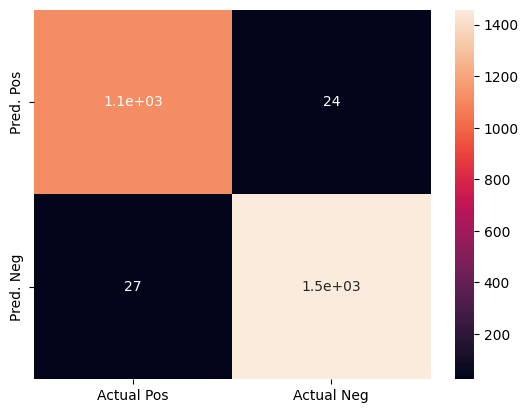

In [ ]:
from sklearn.metrics import confusion_matrix
ab_best_model = AdaBoostClassifier(estimator=dt_model, n_estimators=100)
ab_best_model.fit(train_data[features], train_data[target])

y_true = validation_data['certified']
y_pred = ab_best_model.predict(validation_data[features])
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
plot_confusion_matrix(tp=tp, fp=fp, tn=tn, fn=fn)

### **Neural Networks**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
INPUT_SIZE = len(features)
NUM_CLASSES = 2
BATCH_SIZE = 100

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(INPUT_SIZE, 30)
        self.fc2 = nn.Linear(30, 10)
        self.fc3 = nn.Linear(10, NUM_CLASSES)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
nn_model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(nn_model.parameters())

train_features = torch.tensor(train_data[features].values, dtype=torch.float32)
train_target = torch.tensor(train_data[target].values, dtype=torch.long)
train_dataset = TensorDataset(train_features, train_target)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

validation_features = torch.tensor(validation_data[features].values, dtype=torch.float32)
validation_target = torch.tensor(validation_data[target].values, dtype=torch.long)
validation_dataset = TensorDataset(validation_features, validation_target)
val_loader = DataLoader(validation_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

In [ ]:
def train(model, train_loader, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()
        for i, (inputs, labels) in enumerate(train_loader):
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()


def accuracy(model, data_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in data_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total


# num_epochs = 100
# train(nn_model, train_loader, criterion, optimizer, num_epochs)

# train_accuracy = accuracy(nn_model, train_loader)
# print("Train accuracy:", train_accuracy)

# validation_accuracy = accuracy(nn_model, val_loader)
# print("Validation accuracy:", validation_accuracy)

In [ ]:
import matplotlib.pyplot as plt

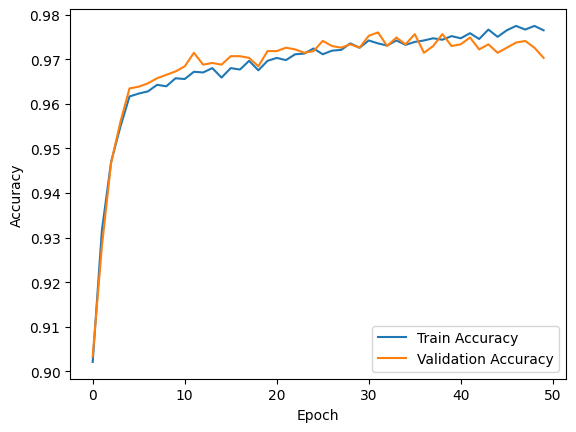

In [ ]:
train_accuracies = []
val_accuracies = []

num_epochs = 50

for epoch in range(num_epochs):
    nn_model.train()
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = nn_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    train_accuracy = accuracy(nn_model, train_loader)
    val_accuracy = accuracy(nn_model, val_loader)

    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

plt.plot(range(num_epochs), train_accuracies, label='Train Accuracy')
plt.plot(range(num_epochs), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### **k-Nearest Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
num_neighbors = list(range(1, 22, 2))
num_neighbors_names = [f'coefficients [#Neighbors={num}]' for num in num_neighbors]

accuracy_data = []

for num, num_neighbors_name in zip(num_neighbors, num_neighbors_names):
    knn_model = KNeighborsClassifier(n_neighbors=num, weights='distance')
    knn_model.fit(train_data[features], train_data[target])

    train_accuracy = accuracy_score(train_data[target], knn_model.predict(train_data[features]))
    validation_accuracy = accuracy_score(validation_data[target], knn_model.predict(validation_data[features]))
    accuracy_data.append({
        'num_neighbors': num,
        'train_accuracy': train_accuracy,
        'validation_accuracy': validation_accuracy
    })

accuracies_table = pd.DataFrame(accuracy_data)

In [ ]:
accuracies_table

,num_neighbors,train_accuracy,validation_accuracy
0,1,1.0,0.951294
1,3,1.0,0.955860
2,5,1.0,0.955099
3,7,1.0,0.955860
4,9,1.0,0.955479
5,11,1.0,0.957763
6,13,1.0,0.955860
7,15,1.0,0.953577
8,17,1.0,0.956621
9,19,1.0,0.953957


### **Prediction**

In [ ]:
df_test = pd.read_csv('edx_test.csv')

df_test = df_test.drop('nplay_video', axis=1)
df_test['start_time_DI'] = (pd.Timestamp.now() - pd.to_datetime(df_test['start_time_DI'], format='%m/%d/%y')).dt.days
df_test['last_event_DI'] = (pd.Timestamp.now() - pd.to_datetime(df_test['last_event_DI'], format='%m/%d/%y')).dt.days

to_save = df_test[['userid_DI']].copy()
# df_test = pd.get_dummies(df_test.drop('userid_DI', axis=1))
df_test = pd.get_dummies(df_test.drop(['userid_DI','explored', 'final_cc_cname_DI'], axis=1))
print(len(features))
imputer = KNNImputer(n_neighbors=5, weights='distance')
df_test = pd.DataFrame(imputer.fit_transform(df_test), columns=df_test.columns)

scaler = StandardScaler()
scaler.fit(df_test[features])
df_test[features] = scaler.transform(df_test[features])

21


In [ ]:
rf_model = RandomForestClassifier(n_estimators=500, max_depth=9)
rf_model.fit(df_train[features], df_train[target])

predictions = rf_model.predict(df_test[features])
to_save.loc[:, 'certified'] = predictions
to_save['certified'] = to_save['certified'].astype(int)
to_save.to_csv('deduct_feature_rf_500_9_drop_three_submission.csv', index=False)

<ipython-input-470-c3c74f299c9d>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  to_save.loc[:, 'certified'] = predictions


**Remember to submit your submissions CSV FILE on Kaggle!** 40 pts come from your accuracy on the private test data.

Attend section on Thurs 5/11 for a demo of how to uppload submissions to Kaggle. We also have screenshots below (ingore summer and homework number in pictures)

Step 1: See the list of files on Colab

![See Colab Files](https://courses.cs.washington.edu/courses/cse416/22su/homework/hw4/programming/1_colab_see_files.jpg)

Step 2: Download `submission.csv`

![Download Colab File](https://courses.cs.washington.edu/courses/cse416/22su/homework/hw4/programming/2_colab_download_file.jpg)

Step 3: Join the Kaggle competition.

![Join the Kaggle Competition](https://courses.cs.washington.edu/courses/cse416/22su/homework/hw4/programming/3_kaggle_join_competition.jpg)

Step 4: Enusre your team name in Kaggle matches the one at the top of this notebook! 

![Check Team Name](https://courses.cs.washington.edu/courses/cse416/22su/homework/hw4/programming/4_kaggle_team_name.jpg)

Step 5: Upload `submission.csv` to Kaggle

![Upload submission.csv](https://courses.cs.washington.edu/courses/cse416/22su/homework/hw4/programming/6_kaggle_upload_submission.jpg)



### **Discussion**



#### **[7 Pts] Training the Models**

**Instructions**: Discuss what models you tried, and what you did to improve your initial predictions. Discuss what hyperparameters you tried, and which hyperparameters seemed important for your final model. Finally, discuss what you are inferring from the above visualiation(s).

#### Overall
We have tried all six models, and using for loops to try different parameters. We then store our accuracies into accuracies_table for further comparisons.
Initial predictions will all possible features


#### Initial predictions will all possible features

    df_train = pd.get_dummies(df_train.drop('userid_DI', axis=1))


In this way, we are not mainly remaining all possible features.
Firstly, the Logistic regression model exhibits relatively low train accuracy and validation accuracy. Additionally, both Neural Network and KNN models are more susceptible to overfitting, as demonstrated by the graph and train accuracy reaching 1 respectively. Specifically, for Neural Networks, the line plot shows the train accuracy immediately surpassed the validation accuracy from the very start of the epoch. For the KNN models, we have tried several different parameters, but finding the train_accuracy insists to 1, which refers to highly overfitting. Thus, we are mainly focus on comparing the remaining models.

Doing the first step, among the rest of the three models, we found that their train accuracy and validation accuracy were not significantly distinct. As our criterion for identifying overfitting is based on a significant disparity in performance between the training and test datasets, we can disregard concerns about overfitting in this case. 

In the Decision Tree model, we tried the two hyperparameters, max_depth and min_samples_split. The max_depth refers to the maximum depth of the tree, and min_samples_split refers to the minimum number of samples required to split an internal node. By trying different combinations, we found the max_depth is more important in influencing the validation accuracy, and the highest validation accuracy is with the hyperparamter max_depth = 7, min_samples_split = 5, train accuracy as 0.982219 and validation accuracy as 0.979072.


In the Random Forest model, we tried the two hyperparameters, n_estimators and  max_depth. The n_estimators refer to the number of trees in the forest, and the max-depth refers to the maximum depth of the tree. By trying different combinations, we found the max_depth is also more important in influencing the validation accuracy. In Random Forest model, we are pleased to see that the validation accuracy of several settings are relatively high, so it inferring to a relatively stable and pleasing results. The best model is with the n_estimators of 200,  max_depth of 21, train accuracy being 0.999837 and validation accuracy being 0.980213, which is the best choice among these three models.


In the AdaBoost model, we tried the the two hyperparameters, estimator and n_estimators. The estimators refer to the base estimator from which the boosted ensemble is built, and we tried max_depth in 1 and 7. The n_estimators refers to the maximum number of estimators at which boosting is terminated. By trying different combinations, we found that the max_depth for base estimator is more important since by increasing the max_depth for base estimator, the model immediately prone to overfitting with the train accuracy insists to 1, while changing the n_estimator seems to influence few in validation accuracy. These models either tend to be overfitting or have fewer validation accuracy, so we also no longer consider using Adaboost as the most final submission.


However, these models are very similar and we take future steps of feature selections to improve our initial predictions.


#### After Feature Selection:

      df_train = pd.get_dummies(df_train.drop(['userid_DI','explored', 'final_cc_cname_DI'], axis=1))

After feature selections(deatils in next section), we are pleased to see that the ranndom forest model is with the highest validtaion accuracy of severl max_depth choices, infering it is very stable and accurate, while the patterns that we analyze for the parameters settings still remains. Thus, we are choosing random forest model as the final model.


#### Inferring From Visulization:

We made the confusion matrix plots for decision trees, random forests and AdaBoost models, and graph of validation accuracy and train accuracy comparison line plot for Nerual Networks and Random Forests. 

      Not so meaningful analytics :(

From line plot of nerual networks, we can tell the validation accuracy of nerual networks cannot beat random forest model. The validation accuracy and the train accuracy are very close in two feature removing version and are relatively low and distinct in all features version. Thus, we can infer that the model improved by removing two features, while it is still a bit worse than Random Forest model.

Since there are more than 2000 different users and the amount of True Positives and True Negatives are really close, we are not able to infer valid information from the confusion matrix we get. 

      Meaningful analytics! :D

Focus on the line plot of random forest comparison, the n_estimator doesn't make a strong influence. When we increase the n_estimators to big enough, there's no significant improvement. In both graph, we observed that the train accuracy and validation accuracy both raises with increasing depths. After analyzing the visualizations and considering the validation accuracy, we have determined that selecting a max_depth of 9 yields the best overall performance for the model and provides good computational efficiency. There is no need for a larger depth beyond this point. Back checking the table, in comparison of n_estimator, we found that the n_estimator of 500 has slighlt better validation accuracy with a roughly same train accuracy. Therefore, we pick the depth of 9 and n_estimator of 500 as of final submission.

#### **[3 Pts] Feature Selection**

**Instructions**: Discuss what features you used and whether you did some transformations on them. What features seemed important for your final model?

The data pre-processing section involved dropping the 'nplay_video' feature due to over 77% missing data. Initially, all features except 'nplay_video' and 'userid_DI' were used to train six models, and the results were recorded. 
We have tried three different settings. The first setting was include all possible features, the second setting was dropping the features that we logistically analyzed that may have negative impact to the results, which are 'registered', 'start_time_DI', 'last_event_DI', 'nchapters', 'YoB', 'gender', and 'nforum_posts.' The final setting was removing 'explored' or 'final_cc_cname_DI' features, as we found these two features heavily impact the results by doing feature combination adjustments.
When using all the features and training the model, the result shows that the validation accuracy reaches the highest on our random forest model which is around 97.7%.
Upon our directly analyzing which features would be influential, 'registered', 'start_time_DI', 'last_event_DI', 'nchapters', 'YoB', 'gender', and 'nforum_posts' were dropped. The models were then trained using the remaining features, and the validation accuracy decreased from 96-98% to 93-97%. Since there’s no enhancement in model performance, we tried to determine which specific features influenced model performance. Therefore, each feature was deleted from the whole set of features, and the resulting model performance was compared. Upon removing the 'explored' or 'final_cc_cname_DI' features, the model performance improved significantly. Thus, both features were removed, resulting in the highest validation accuracy of 98.22% in the random forest model. Therefore, all features except 'nplay_video', 'explored' and 'final_cc_cname_DI' were used for training.
To preprocess the 'start_time_DI' and 'last_event_DI' features, they were converted from strings to numeric days. The 'userid_DI' column was dropped, and one-hot encoding was used for string-type columns, with the resulting data stored as features, excluding the 'certified' target.


#### **[5 Pts] Ethical Implications**

**Instructions**: Consider and discuss the ethical implications of using the model you trained. Imagine you were hired to work as a data scientist for an online education platform (exciting, right?). They want to use your model to predict which students they should tailor their course material towards so they can maximize their profits. Their idea is to use the model to help predict which student groups (i.e. from specific countries or certain educational backgrounds) would make them the most money by getting the most participants to complete their paid certificate program. Are there any ethical considerations we should think about before acting on that plan?

One of the main ethical considerations that we should think about is bias problem. Since the data used for training the model is collected from Harvard and MIT university and both of these two universities are private American universities, the tuition, cost of living, and other restrictions might already have an impact from the economic class aspect. It is worth thinking about which part of college students the model can be used on and whether it is appropriate and important to think about the economic dimension of ethics.

Moreover, although the data collected is de-identified, this doesn't 100% protect students' privacy. We may need to think about whether the use of our model would harm students' privacy.

More importantly, an online education platform should give the highest priority to ensuring that the platform provides a high quality education and that it is disseminated and fair and promotes academic integrity, not profit. Using our model to predict which students are most likely to complete a paid certificate program may sacrifice quality of education to increase program completion rates.

At the same time, no model will guarantee a 100% correct prediction rate and our model has an error rate of about 2%, Such a model applied to data with a large population would also lead to terrible result. An online education platform relying only on model predictions to decide which students to offer online education can lead to important courses being overlooked.

Finally, if the our model is used for the platform, the platform should be responsible for the model and be transparent about how the model make the predictions. The platform should also be open to both positive and negative feedback from stakeholders.